In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_energy_consumption.csv", parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

# Display first few rows
df.head()



,Energy_Consumption
Timestamp,
2025-01-01 00:00:00,106.692457
2025-01-01 01:00:00,104.145069
2025-01-01 02:00:00,99.613654
2025-01-01 03:00:00,109.890627
2025-01-01 04:00:00,105.237329


In [3]:
#Summary statistics
df.describe()

,Energy_Consumption
count,8760.000000
mean,100.023229
std,16.555314
min,53.909929
25%,87.179359
50%,99.804705
75%,112.857167
max,141.060188


In [4]:
#Check for missing values
df.isnull().sum()

Energy_Consumption    0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot entire time series
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Energy_Consumption"], label="Energy Consumption")
plt.title("Synthetic Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [6]:
seaborn --version

NameError: name 'seaborn' is not defined

In [7]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\Scripts\python.exe -m pip install --upgrade pip' command.


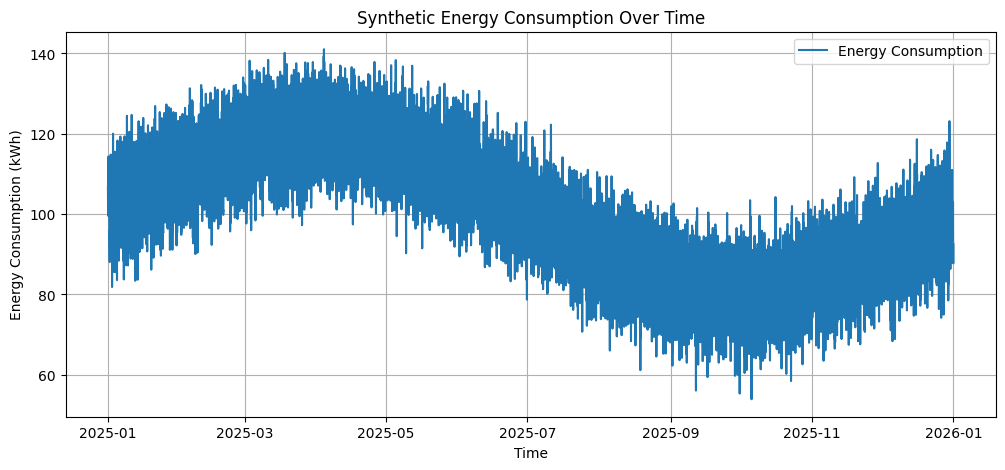

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the entire time series
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Energy_Consumption"], label="Energy Consumption")
plt.title("Synthetic Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()


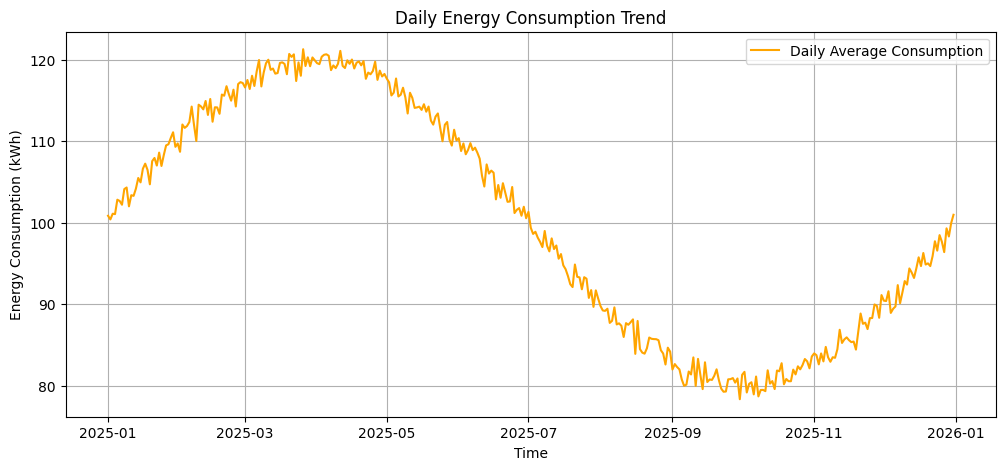

In [9]:
# Resample data to daily averages
df_daily = df.resample("D").mean()

plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily["Energy_Consumption"], label="Daily Average Consumption", color="orange")
plt.title("Daily Energy Consumption Trend")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()


In [10]:
!pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for fpdf, since package 'wheel' is not installed.
  Running setup.py install for fpdf: started
  Running setup.py install for fpdf: finished with status 'done'


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
import fpdf
print(fpdf.__version__)

1.7.2


In [12]:
#Generate a Summary Report 

from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", style='', size=12)

pdf.cell(200, 10, "Energy Consumption Analysis", ln=True, align='C')
pdf.ln(10)
pdf.multi_cell(0, 10, "This report summarizes the key findings from the synthetic energy consumption dataset.")

pdf.multi_cell(0, 10, "Key Observations:\n- Mean Consumption: ~100 kWh\n- Seasonal trends: Higher in winter, lower in summer\n- Daily fluctuations observed with peaks at certain hours.")

pdf.multi_cell(0, 10, "Next Steps:\n- Implementing ARIMA, Prophet, and LSTM forecasting models.")

pdf.output("energy_analysis_summary.pdf")


''

In [13]:
!pip install statsmodels pmdarima prophet

     ---------------------------------------- 9.9/9.9 MB 6.7 MB/s eta 0:00:00
     ------------------------------------- 615.0/615.0 KB 37.8 MB/s eta 0:00:00
     ---------------------------------------- 13.3/13.3 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 232.9/232.9 KB 7.2 MB/s eta 0:00:00
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
     ---------------------------------------- 2.8/2.8 MB 6.8 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     -------------------------------------- 94.5/94.5 KB 674.1 kB/s eta 0:00:00
     -------------------------------------- 820.7/820.7 KB 5.2 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\Scripts\python.exe -m pip install --upgrade pip' command.


Importing plotly failed. Interactive plots will not work.


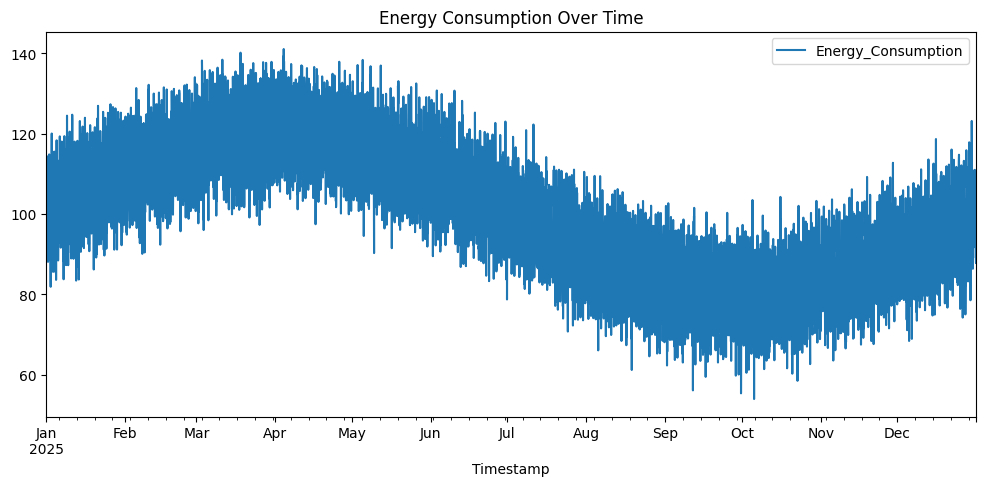

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

#load dataset
df = pd.read_csv("synthetic_energy_consumption.csv", parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

#Plot original time-series
df.plot(figsize=(12, 5), title="Energy Consumption Over Time")
plt.show()

#Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
!pip install plotly

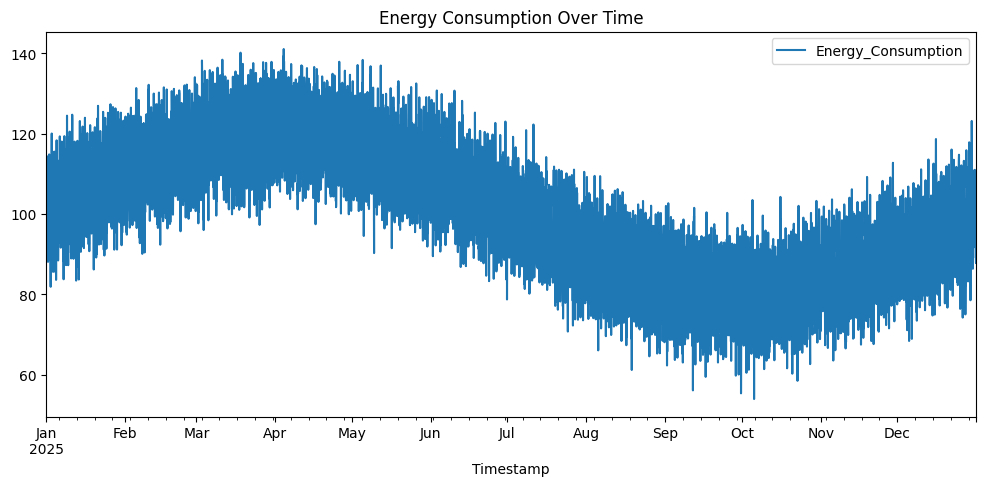

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

#load dataset
df = pd.read_csv("synthetic_energy_consumption.csv", parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

#Plot original time-series
df.plot(figsize=(12, 5), title="Energy Consumption Over Time")
plt.show()

#Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

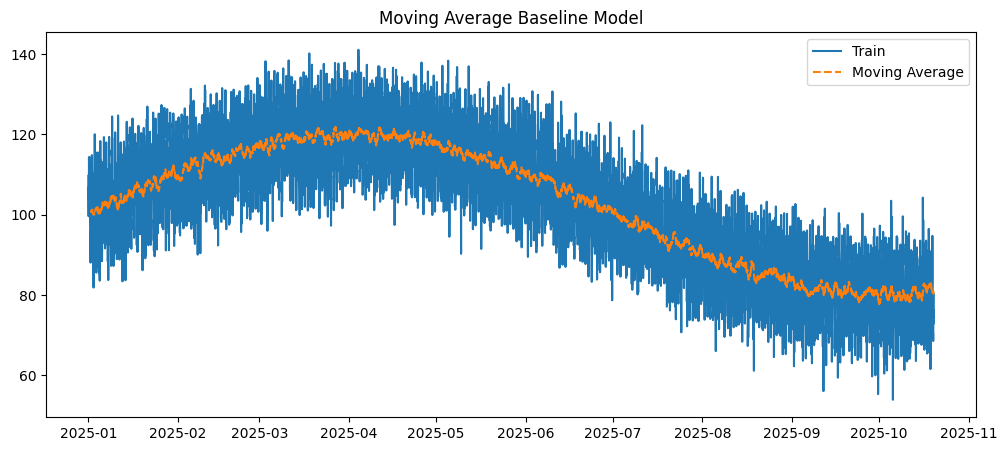

In [2]:
###Moving Average Baseline Model###
moving_avg = train['Energy_Consumption'].rolling(window=24).mean()

# Plot Moving Average
plt.figure(figsize=(12,5))
plt.plot(train.index, train['Energy_Consumption'], label='Train')
plt.plot(train.index, moving_avg, label='Moving Average', linestyle='dashed')
plt.legend()
plt.title("Moving Average Baseline Model")
plt.show()


C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


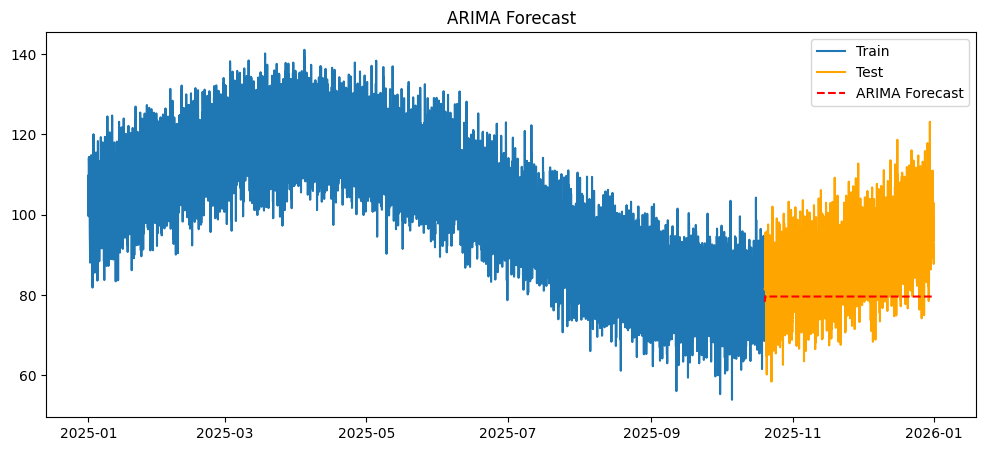

In [3]:
###ARIMA Model###
# Fit ARIMA model
arima_model = ARIMA(train['Energy_Consumption'], order=(5,1,0))
arima_result = arima_model.fit()

#Forecast
arima_forecast = arima_result.forecast(steps=len(test))

#Plot ARIMA forecast
plt.figure(figsize=(12,5))
plt.plot(train.index, train['Energy_Consumption'], label='Train')
plt.plot(test.index, test['Energy_Consumption'], label='Test', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='dashed', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


15:26:29 - cmdstanpy - INFO - Chain [1] start processing
15:26:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


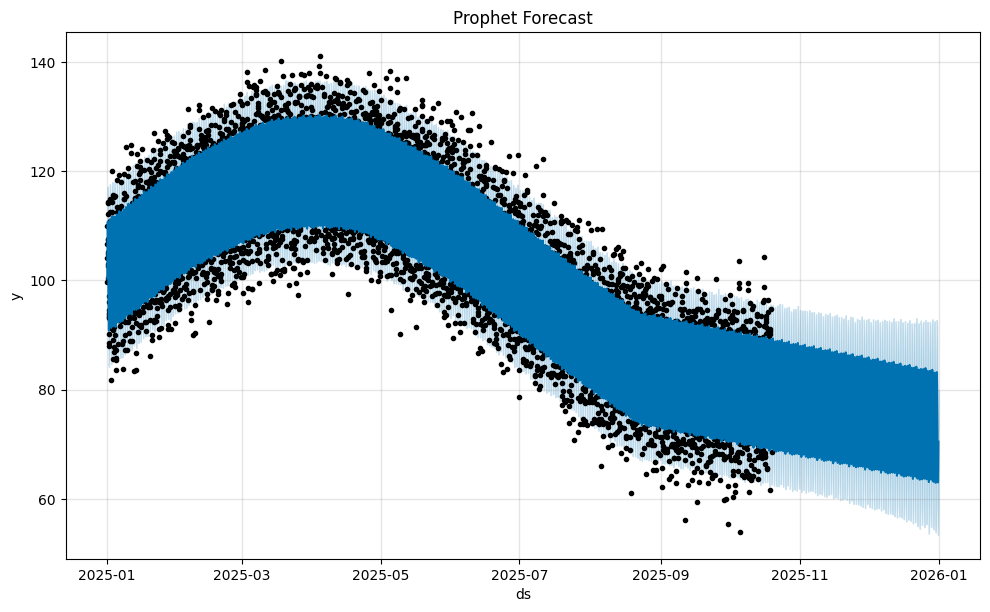

In [4]:
###Prophet Model###

#Prepare data for Prophet
prophet_df = train.reset_index().rename(columns={"Timestamp": "ds", "Energy_Consumption": "y"})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

#Forecast
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')
forecast = prophet_model.predict(future)

#Plot Prophet forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

In [5]:
###Model Evaluation###
mae_arima = mean_absolute_error(test['Energy_Consumption'], arima_forecast)
mse_arima = mean_squared_error(test['Energy_Consumption'], arima_forecast)
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

ARIMA MAE: 11.24, RMSE: 13.81


In [ ]:
!pip install tensorflow

C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.0424 - val_loss: 0.0060
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 9/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 10/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 11/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 12/20
437/437 ━━━━━━━━━━━

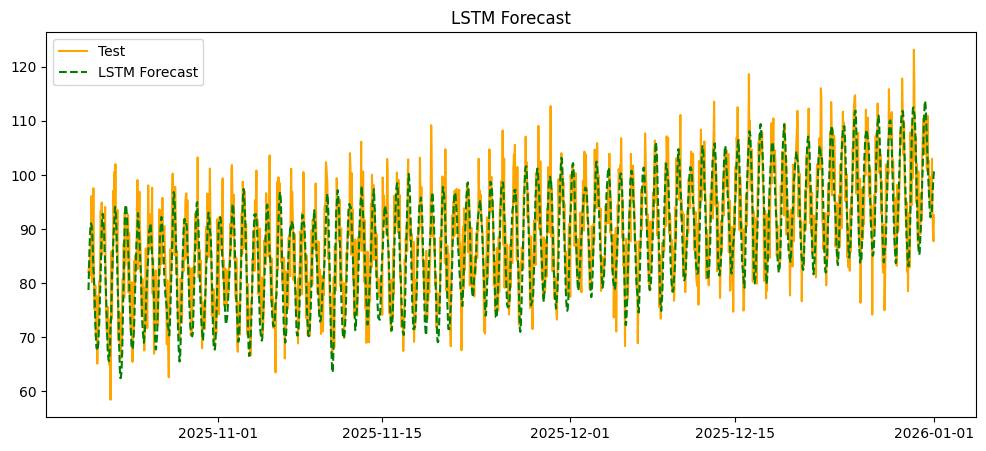

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

###LSTM Model###

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train[['Energy_Consumption']])
test_scaled = scaler.transform(test[['Energy_Consumption']])

# Prepare LSTM sequences
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 24
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Forecast using LSTM
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot LSTM forecast
plt.figure(figsize=(12,5))
plt.plot(test.index[seq_length:], test['Energy_Consumption'].iloc[seq_length:], label='Test', color='orange')
plt.plot(test.index[seq_length:], predictions, label='LSTM Forecast', linestyle='dashed', color='green')
plt.legend()
plt.title("LSTM Forecast")
plt.show()

In [4]:
### Model Evaluation ###
mae_arima = mean_absolute_error(test['Energy_Consumption'], arima_forecast)
mse_arima = mean_squared_error(test['Energy_Consumption'], arima_forecast)
rmse_arima = np.sqrt(mse_arima)

mae_lstm = mean_absolute_error(test['Energy_Consumption'].iloc[seq_length:], predictions)
mse_lstm = mean_squared_error(test['Energy_Consumption'].iloc[seq_length:], predictions)
rmse_lstm = np.sqrt(mse_lstm)

print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}")

ARIMA MAE: 11.24, RMSE: 13.81
LSTM MAE: 4.71, RMSE: 5.88


In [5]:
from fpdf import FPDF

# Create a PDF instance
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", style='', size=12)

# Title
pdf.cell(200, 10, "Energy Consumption Forecasting Summary", ln=True, align='C')
pdf.ln(10)

# Model Performance Results
summary_text = f"""
--- Summary of Forecasting Model Performance ---

The ARIMA model performed with a RMSE of {rmse_arima:.2f}.
The LSTM model showed improved accuracy with a RMSE of {rmse_lstm:.2f}.

Overall, the LSTM model captured complex patterns better than ARIMA.
"""

# Add text to PDF
pdf.multi_cell(0, 10, summary_text)

# Save PDF
pdf_filename = "energy_forecasting_summary.pdf"
pdf.output(pdf_filename)
print(f"Summary report saved as {pdf_filename}")


Summary report saved as energy_forecasting_summary.pdf
